Import Libraries

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

Read Dataset

In [ ]:
data = pd.read_csv(r"Iris_data.csv")
print(data.head())  
data

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Applying KNN 

Create Confusion Matrix 

In [26]:
X = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=38)
model = KNeighborsClassifier(n_neighbors=5)   
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[13  0  0]
 [ 0 10  2]
 [ 0  0 13]]


Calculate the measures For each class

In [27]:
cm = confusion_matrix(y_test, y_pred)
total = np.sum(cm)
classes = data['Species'].unique()

for k in range(len(classes)):
    print(f"\nClass: {classes[k]}") 
    
    TP = cm[k][k]
    
    row_sum = np.sum(cm[k, :])     # actual class k
    col_sum = np.sum(cm[:, k])     # predicted class k
    
    FN = row_sum - TP
    FP = col_sum - TP
    TN = total - (TP + FP + FN)

    P = TP + FN
    N = FP + TN
    
    accuracy = (TP+TN) / total 
    precision = TP /(TP + FP)
    recall = TP/ (P+FN)
    f1_score = 2*(precision*recall)/(precision + recall)
    error_rate = (FP + FN) / total
    
    print("TP =", TP)
    print("FN =", FN)
    print("FP =", FP)
    print("TN =", TN)
    print("P  =", P)
    print("N  =", N) 
    print("\nAccuracy : ", accuracy)
    print("Precision : ", precision)
    print("Sensitivity : ", recall)
    print("F1 Score : ", f1_score)
    print("Error Rate : ", error_rate)


Class: Iris-setosa
TP = 13
FN = 0
FP = 0
TN = 25
P  = 13
N  = 25

Accuracy :  1.0
Precision :  1.0
Sensitivity :  1.0
F1 Score :  1.0
Error Rate :  0.0

Class: Iris-versicolor
TP = 10
FN = 2
FP = 0
TN = 26
P  = 12
N  = 26

Accuracy :  0.9473684210526315
Precision :  1.0
Sensitivity :  0.7142857142857143
F1 Score :  0.8333333333333333
Error Rate :  0.05263157894736842

Class: Iris-virginica
TP = 13
FN = 0
FP = 2
TN = 23
P  = 13
N  = 25

Accuracy :  0.9473684210526315
Precision :  0.8666666666666667
Sensitivity :  1.0
F1 Score :  0.9285714285714286
Error Rate :  0.05263157894736842


Calculate measures for total of classes

In [28]:
import numpy as np

cm = confusion_matrix(y_test, y_pred)
total = np.sum(cm)

TP_total = np.trace(cm)

rows= np.sum(cm, axis=1)

cols = np.sum(cm, axis=0)

FN_total = 0
FP_total = 0

for k in range(len(cm)):
    FN_total += rows[k] - cm[k][k]
    FP_total += cols[k] - cm[k][k]

TN_total = total - (TP_total + FP_total + FN_total)


accu = TP_total / total
prs = TP_total / (TP_total + FP_total)
recall = TP_total / (TP_total + FN_total)   # sensitivity
f1 = (2 * TP_total) / (2*TP_total + FP_total + FN_total)
err_r = 1 - accu


print("Accuracy :", accu)
print("Precision :", prs)
print("F1 Score :", f1)
print("Sensitivity :", recall)
print("Error Rate :", err_r)


Accuracy : 0.9473684210526315
Precision : 0.9473684210526315
F1 Score : 0.9473684210526315
Sensitivity : 0.9473684210526315
Error Rate : 0.052631578947368474


View ROC Graph

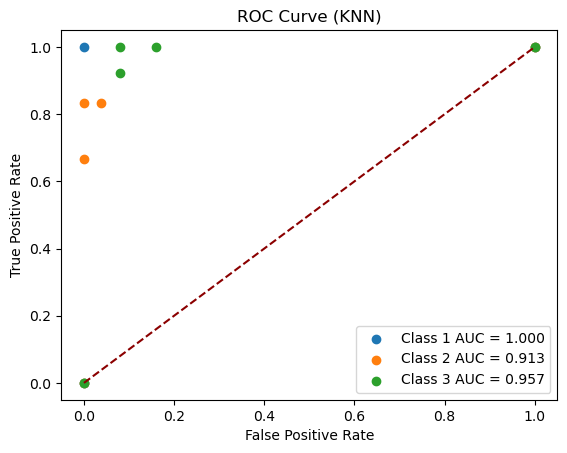

In [29]:
y_bin = label_binarize(y_test, classes=['Iris-setosa','Iris-versicolor','Iris-virginica'])
y_score = model.predict_proba(X_test)

for i in range(3):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.scatter(fpr, tpr, label=f"Class {i+1} AUC = {roc_auc:.3f}")  # Use scatter for dots

plt.plot([0,1],[0,1],'--', color='darkred')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (KNN)")
plt.legend()
plt.show()